# DPBF

In [39]:
import numpy as np
ialbf_init_time = [0.05, 0.05, 0.05]
ialbf_init_fpr = [0.008612, 0.007815, 0.008847]
ialbf_init_mem_bf = np.array([18592, 17296, 17520])
ialbf_init_mem_clf = np.array([56, 56, 56])
ialbf_init_mem_total = ialbf_init_mem_clf + ialbf_init_mem_bf
ialbf_insert_time = [0.03, 0.02, 0.02]
ialbf_insert_time_train = [0.03, 0.02, 0.02]
ialbf_insert_fpr_ins = [0.006491, 0.008579, 0.008910]
ialbf_insert_fpr_test = [0.006030, 0.011207, 0.008151]
ialbf_insert_fpr_all = [0.007161, 0.008951, 0.008696]
ialbf_insert_mem_bf = np.array([12578.00, 17296, 17520])
ialbf_insert_mem_total = ialbf_init_mem_clf + ialbf_insert_mem_bf

In [33]:
calbf1_init_time = [0.05, 0.04, 0.04]
calbf1_init_fpr = [0.011644, 0.011475, 0.005418]
calbf1_init_mem_bf = np.array([56, 56, 56])
calbf1_init_mem_clf = np.array([56, 56, 56])
calbf1_init_mem_clf_full = np.array([488, 488, 488])
calbf1_init_mem_total = calbf1_init_mem_clf + calbf1_init_mem_bf
calbf1_insert_time = [0.02, 0.02, 0.02]
calbf1_insert_time_train = [0.18, 0.18, 0.18]
calbf1_insert_fpr_ins = [0.054822, 0.046982, 0.057388]
calbf1_insert_fpr_test = [0.055527, 0.045853, 0.051610]
calbf1_insert_fpr_all = [0.053197, 0.048977, 0.055371]
calbf1_insert_mem_bf = np.array([112, 112, 112])
calbf1_insert_mem_total = calbf1_init_mem_clf + calbf1_insert_mem_bf

In [34]:
calbf2_init_time = [0.04, 0.05, 0.05]
calbf2_init_fpr = [0.007855, 0.011712, 0.009997]
calbf2_init_mem_bf = np.array([56.00, 56, 56])
calbf2_init_mem_clf = np.array([56.00, 56, 56])
calbf2_init_mem_clf_full = np.array([488, 488, 488])
calbf2_init_mem_total = calbf2_init_mem_clf + calbf2_init_mem_bf
calbf2_insert_time = [0.02, 0.02, 0.02]
calbf2_insert_time_train = [0.26, 0.26, 0.26]
calbf2_insert_fpr_ins = [0.053456, 0.052632, 0.052917]
calbf2_insert_fpr_test = [0.047570, 0.048174, 0.045662]
calbf2_insert_fpr_all = [0.051151, 0.051151, 0.050384]
calbf2_insert_mem_bf = np.array([112, 112, 112])
calbf2_insert_mem_total = calbf2_init_mem_clf + calbf2_insert_mem_bf

In [41]:
base_init_time = [0.04, 0.05, 0.05]
base_init_fpr = [0.012313, 0.013313, 0.014313]
base_init_mem_bf = np.array([56.00, 56, 56])
base_init_mem_clf = np.array([56.00, 56, 56])
base_init_mem_clf_full = np.array([488, 488, 488])
base_init_mem_total = base_init_mem_clf + base_init_mem_bf
base_insert_time = [0.02, 0.02, 0.02]
base_insert_time_train = [0.02, 0.02, 0.02]
base_insert_fpr_ins = [0.057763, 0.059763, 0.058763]
base_insert_fpr_test = [0.058664, 0.059664, 0.057664]
base_insert_fpr_all = [0.056767, 0.058767, 0.057767]
base_insert_mem_bf = np.array([56.00, 56, 56])
base_insert_mem_total = base_init_mem_clf + base_insert_mem_bf

In [36]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('seaborn-muted')
# plt.rcParams.update({'font.size': 12})

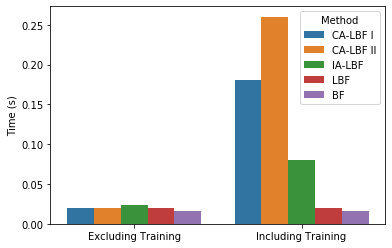

In [44]:
bf_init_time = [0.01, 0.02, 0.02]
bf_insert_time = [0.01, 0.02, 0.02]

import pandas as pd

df = pd.DataFrame()
df.insert(0, 'LBF', base_insert_time + base_insert_time_train)
df.insert(1, 'CA-LBF I', calbf1_insert_time + calbf1_insert_time_train)
df.insert(2, 'CA-LBF II', calbf2_insert_time + calbf2_insert_time_train)
df.insert(3, 'IA-LBF', ialbf_insert_time + ialbf_insert_time_train)
df.insert(4, 'BF', bf_insert_time + bf_insert_time)
df.insert(5, 'Type', ['Excluding Training'] * 3 + ['Including Training'] * 3)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mdf = df.melt(id_vars=['Type'], value_vars=['CA-LBF I', 'CA-LBF II', 'IA-LBF', 'LBF', 'BF'])
g = sns.barplot('Type', 'value', hue='variable', data=mdf, ci=None)
g.set(ylabel='Time (s)', xlabel='')
handles, labels = g.get_legend_handles_labels()
g.legend(handles=handles, labels=labels, title="Method")
plt.savefig('plots/letor_time.pdf')

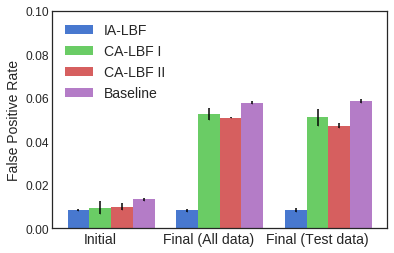

In [55]:
x_axis = np.array([0, 1, 2])
width = 0.2
plt.bar(x_axis - width, [np.mean(ialbf_init_fpr), np.mean(ialbf_insert_fpr_all), np.mean(ialbf_insert_fpr_test)], 
        yerr = [np.std(ialbf_init_fpr), np.std(ialbf_insert_fpr_all), np.std(ialbf_insert_fpr_all)], capsize=0.1,
        width=width, label='IA-LBF')
plt.bar(x_axis , [np.mean(calbf1_init_fpr), np.mean(calbf1_insert_fpr_all), np.mean(calbf1_insert_fpr_test)], 
        yerr = [np.std(calbf1_init_fpr), np.std(calbf1_insert_fpr_all), np.std(calbf1_insert_fpr_test)], capsize=0.1,
        width=width, label='CA-LBF I')
plt.bar(x_axis + width, [np.mean(calbf2_init_fpr), np.mean(calbf2_insert_fpr_all), np.mean(calbf2_insert_fpr_test)], 
        yerr = [np.std(calbf2_init_fpr), np.std(calbf2_insert_fpr_all), np.std(calbf2_insert_fpr_test)], capsize=0.1,
        width=width, label='CA-LBF II')
plt.bar(x_axis + 2*width, [np.mean(base_init_fpr), np.mean(base_insert_fpr_all), np.mean(base_insert_fpr_test)], 
        yerr = [np.std(base_init_fpr), np.std(base_insert_fpr_all), np.std(base_insert_fpr_test)], capsize=0.1,
        width=width, label='Baseline')
plt.xticks([0, 1, 2], ['Initial', 'Final (All data)', 'Final (Test data)'], fontsize=14)
plt.ylim([0, 0.1])
plt.ylabel('False Positive Rate', fontsize=14)
#plt.title('False positive rates for LETOR (all data)', fontsize=16)
plt.legend(fontsize=14)
plt.savefig('plots/letor_fpr.png')
plt.savefig('plots/letor_fpr.pdf')

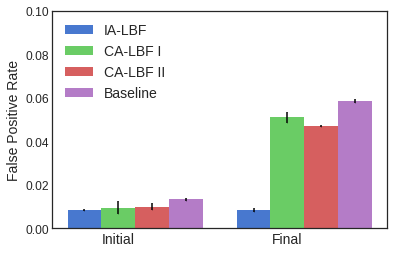

In [56]:
x_axis = np.array([0, 1])
width = 0.2
plt.bar(x_axis - width, [np.mean(ialbf_init_fpr), np.mean(ialbf_insert_fpr_test)], 
        yerr = [np.std(ialbf_init_fpr), np.std(ialbf_insert_fpr_all)], capsize=0.1,
        width=width, label='IA-LBF')
plt.bar(x_axis , [np.mean(calbf1_init_fpr), np.mean(calbf1_insert_fpr_test)], 
        yerr = [np.std(calbf1_init_fpr), np.std(calbf1_insert_fpr_all)], capsize=0.1,
        width=width, label='CA-LBF I')
plt.bar(x_axis + width, [np.mean(calbf2_init_fpr), np.mean(calbf2_insert_fpr_test)], 
        yerr = [np.std(calbf2_init_fpr), np.std(calbf2_insert_fpr_all)], capsize=0.1,
        width=width, label='CA-LBF II')
plt.bar(x_axis + 2*width, [np.mean(base_init_fpr), np.mean(base_insert_fpr_test)], 
        yerr = [np.std(base_init_fpr), np.std(base_insert_fpr_all)], capsize=0.1,
        width=width, label='Baseline')
plt.xticks([0, 1], ['Initial', 'Final'], fontsize=14)
plt.ylim([0, 0.1])
plt.ylabel('False Positive Rate', fontsize=14)
#plt.title('False positive rates for LETOR (test (unseen) data)', fontsize=16)
plt.legend(fontsize=14)
plt.savefig('plots/letor_fpr_all.png')
plt.savefig('plots/letor_fpr_all.pdf')

[18648 17352 17576]
[12634. 17352. 17576.]


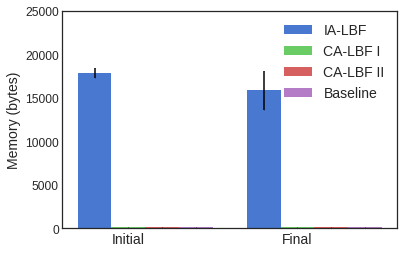

In [57]:
x_axis = np.array([0, 1])
width = 0.2
print(ialbf_init_mem_total)
print(ialbf_insert_mem_total)
plt.bar(x_axis - width, [np.mean(ialbf_init_mem_total), np.mean(ialbf_insert_mem_total)], 
        yerr = [np.std(ialbf_init_mem_total), np.std(ialbf_insert_mem_total)], capsize=0.1,
        width=width, label='IA-LBF')
plt.bar(x_axis , [np.mean(calbf1_init_mem_total), np.mean(calbf1_insert_mem_total)], 
        yerr = [np.std(calbf1_init_mem_total), np.std(calbf1_insert_mem_total)], capsize=0.1,
        width=width, label='CA-LBF I')
plt.bar(x_axis + width, [np.mean(calbf2_init_mem_total), np.mean(calbf2_insert_mem_total)], 
        yerr = [np.std(calbf2_init_mem_total), np.std(calbf2_insert_mem_total)], capsize=0.1,
        width=width, label='CA-LBF II')
plt.bar(x_axis + 2*width, [np.mean(base_init_mem_total), np.mean(base_insert_mem_total)], 
        yerr = [np.std(base_init_mem_total), np.std(base_insert_mem_total)], capsize=0.1,
        width=width, label='Baseline')
plt.xticks([0, 1], ['Initial', 'Final'], fontsize=14)
plt.ylim([0, 25000])
plt.ylabel('Memory (bytes)', fontsize=14)
#plt.title('Memory usage for LETOR', fontsize=16)
plt.legend(fontsize=14)
plt.savefig('plots/letor_mem.png')
plt.savefig('plots/letor_mem.pdf')

[0.05, 0.05, 0.05]
[0.02, 0.02, 0.02]


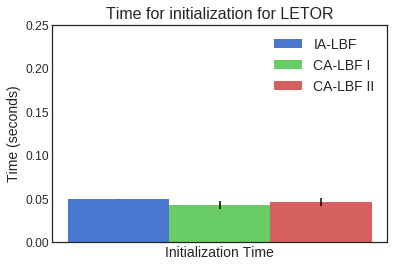

In [58]:
x_axis = np.array([0])
width = 0.1
print(ialbf_init_time)
print(ialbf_insert_time)
plt.bar(x_axis - width, [np.mean(ialbf_init_time)], 
        yerr = [np.std(ialbf_init_time)], capsize=0.1,
        width=width, label='IA-LBF')
plt.bar(x_axis , [np.mean(calbf1_init_time)], 
        yerr = [np.std(calbf1_init_time)], capsize=0.1,
        width=width, label='CA-LBF I')
plt.bar(x_axis + width, [np.mean(calbf2_init_time)], 
        yerr = [np.std(calbf2_init_time)], capsize=0.1,
        width=width, label='CA-LBF II')
plt.xticks([0], ['Initialization Time'], fontsize=14)
plt.ylim([0, 0.25])
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Time for initialization for LETOR', fontsize=16)
plt.legend(fontsize=14)
plt.savefig('plots/letor_time.png')
plt.savefig('plots/letor_time.pdf')

[0.05, 0.05, 0.05]
[0.02, 0.02, 0.02]


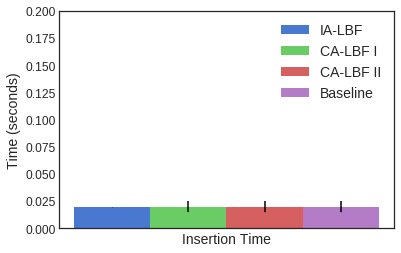

In [59]:
x_axis = np.array([0])
width = 0.1
print(ialbf_init_time)
print(ialbf_insert_time)
plt.bar(x_axis - 1.5*width, [np.mean(ialbf_insert_time)], 
        yerr = [np.std(ialbf_init_time)], capsize=0.1,
        width=width, label='IA-LBF')
plt.bar(x_axis - 0.5*width, [np.mean(calbf1_insert_time)], 
        yerr = [np.std(calbf1_init_time)], capsize=0.1,
        width=width, label='CA-LBF I')
plt.bar(x_axis + 0.5*width, [np.mean(calbf2_insert_time)], 
        yerr = [np.std(calbf2_init_time)], capsize=0.1,
        width=width, label='CA-LBF II')
plt.bar(x_axis + 1.5*width, [np.mean(base_insert_time)], 
        yerr = [np.std(base_init_time)], capsize=0.1,
        width=width, label='Baseline')
plt.xticks([0], ['Insertion Time'], fontsize=14)
plt.ylim([0, 0.2])
plt.ylabel('Time (seconds)', fontsize=14)
#plt.title('Time for insertion per 1000 elements for LETOR', fontsize=16)
plt.legend(fontsize=14)
plt.savefig('plots/letor_time.png')
plt.savefig('plots/letor_time.pdf')

[0.05, 0.05, 0.05]
[0.02, 0.02, 0.02]


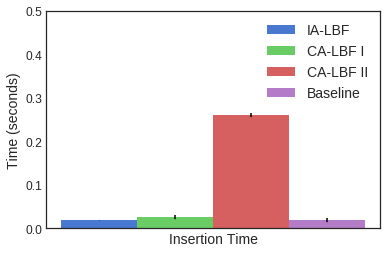

In [60]:
x_axis = np.array([0])
width = 0.1
print(ialbf_init_time)
print(ialbf_insert_time)
plt.bar(x_axis - 1.5*width, [np.mean(ialbf_insert_time)], 
        yerr = [np.std(ialbf_init_time)], capsize=0.1,
        width=width, label='IA-LBF')
plt.bar(x_axis -0.5*width, [np.mean(calbf1_insert_time_train)], 
        yerr = [np.std(calbf1_init_time)], capsize=0.1,
        width=width, label='CA-LBF I')
plt.bar(x_axis + 0.5*width, [np.mean(calbf2_insert_time_train)], 
        yerr = [np.std(calbf2_init_time)], capsize=0.1,
        width=width, label='CA-LBF II')
plt.bar(x_axis + 1.5*width, [np.mean(base_insert_time_train)], 
        yerr = [np.std(base_init_time)], capsize=0.1,
        width=width, label='Baseline')
plt.xticks([0], ['Insertion Time'], fontsize=14)
plt.ylim([0, 0.5])
plt.ylabel('Time (seconds)', fontsize=14)
#plt.title('Time for insertion per 1000 elements (including training) for LETOR', fontsize=16)
plt.legend(fontsize=14)
plt.savefig('plots/letor_time_train.png')
plt.savefig('plots/letor_time_train.pdf')

[0.05, 0.05, 0.05]
[0.02, 0.02, 0.02]


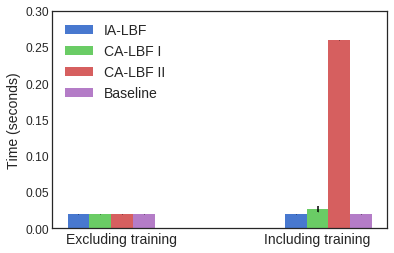

In [61]:
x_axis = np.array([0, 1])
width = 0.1
print(ialbf_init_time)
print(ialbf_insert_time)
plt.bar(x_axis - width, [np.mean(ialbf_insert_time), np.mean(ialbf_insert_time)], 
        yerr = [np.std(ialbf_init_time), np.std(ialbf_init_time)], capsize=0.1,
        width=width, label='IA-LBF')
plt.bar(x_axis , [np.mean(calbf1_insert_time), np.mean(calbf1_insert_time_train)], 
        yerr = [np.std(calbf1_insert_time), np.std(calbf1_insert_time_train)], capsize=0.1,
        width=width, label='CA-LBF I')
plt.bar(x_axis + width, [np.mean(calbf2_insert_time), np.mean(calbf2_insert_time_train)], 
        yerr = [np.std(calbf2_insert_time), np.std(calbf2_insert_time_train)], capsize=0.1,
        width=width, label='CA-LBF II')
plt.bar(x_axis + 2*width, [np.mean(base_insert_time), np.mean(base_insert_time_train)], 
        yerr = [np.std(base_insert_time), np.std(base_insert_time_train)], capsize=0.1,
        width=width, label='Baseline')
plt.xticks([0.1, 1], ['Excluding training', 'Including training'], fontsize=14)
plt.ylim([0, 0.3])
plt.ylabel('Time (seconds)', fontsize=14)
#plt.title('Time for insertion per 1000 elements for LETOR', fontsize=16)
plt.legend(fontsize=14)
plt.savefig('plots/letor_time_all.png')
plt.savefig('plots/letor_time_all.pdf')

In [62]:
row_labels = ['Init Time', 'Initial FPR', 'Initial Memory', 'Final FPR', 'Final Memory']
col_labels = ['IA-LBF', 'CA-LBF I', 'CA-LBF II']
cell_text = [[np.mean(ialbf_init_time), np.mean(calbf1_init_time), np.mean(calbf2_init_time)],
            [np.mean(ialbf_init_fpr), np.mean(calbf1_init_fpr), np.mean(calbf2_init_fpr)],
            [np.mean(ialbf_init_mem_total), np.mean(calbf1_init_mem_total), np.mean(calbf2_init_mem_total)],
            [np.mean(ialbf_insert_fpr_all), np.mean(calbf1_insert_fpr_all), np.mean(calbf2_insert_fpr_all)],
            [np.mean(ialbf_insert_mem_total), np.mean(calbf1_insert_mem_total), np.mean(calbf2_insert_mem_total)]]
import pandas as pd
df_mean = pd.DataFrame(cell_text, columns=col_labels, index=row_labels)

row_labels = ['Init Time', 'Initial FPR', 'Initial Memory', 'Final FPR', 'Final Memory']
col_labels = ['IA-LBF', 'CA-LBF I', 'CA-LBF II']
cell_text = [[np.std(ialbf_init_time), np.std(calbf1_init_time), np.std(calbf2_init_time)],
            [np.std(ialbf_init_fpr), np.std(calbf1_init_fpr), np.std(calbf2_init_fpr)],
            [np.std(ialbf_init_mem_total), np.std(calbf1_init_mem_total), np.std(calbf2_init_mem_total)],
            [np.std(ialbf_insert_fpr_all), np.std(calbf1_insert_fpr_all), np.std(calbf2_insert_fpr_all)],
            [np.std(ialbf_insert_mem_total), np.std(calbf1_insert_mem_total), np.std(calbf2_insert_mem_total)]]
df_std = pd.DataFrame(cell_text, columns=col_labels, index=row_labels)

In [63]:
df_std

,IA-LBF,CA-LBF I,CA-LBF II
Init Time,6.938894e-18,0.004714,0.004714
Initial FPR,4.416457e-04,0.002896,0.001578
Initial Memory,5.655848e+02,0.000000,0.000000
Final FPR,7.905940e-04,0.002655,0.000362
Final Memory,2.278720e+03,0.000000,0.000000


[0.05, 0.05, 0.05]
[0.02, 0.02, 0.02]


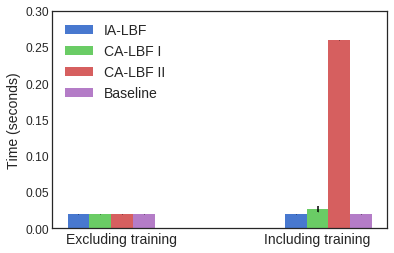

In [64]:
x_axis = np.array([0, 1])
width = 0.1
print(ialbf_init_time)
print(ialbf_insert_time)
plt.bar(x_axis - width, [np.mean(ialbf_insert_time), np.mean(ialbf_insert_time)], 
        yerr = [np.std(ialbf_init_time), np.std(ialbf_init_time)], capsize=0.1,
        width=width, label='IA-LBF')
plt.bar(x_axis , [np.mean(calbf1_insert_time), np.mean(calbf1_insert_time_train)], 
        yerr = [np.std(calbf1_insert_time), np.std(calbf1_insert_time_train)], capsize=0.1,
        width=width, label='CA-LBF I')
plt.bar(x_axis + width, [np.mean(calbf2_insert_time), np.mean(calbf2_insert_time_train)], 
        yerr = [np.std(calbf2_insert_time), np.std(calbf2_insert_time_train)], capsize=0.1,
        width=width, label='CA-LBF II')
plt.bar(x_axis + 2*width, [np.mean(base_insert_time), np.mean(base_insert_time_train)], 
        yerr = [np.std(base_insert_time), np.std(base_insert_time_train)], capsize=0.1,
        width=width, label='Baseline')
plt.xticks([0.1, 1], ['Excluding training', 'Including training'], fontsize=14)
plt.ylim([0, 0.3])
plt.ylabel('Time (seconds)', fontsize=14)
#plt.title('Time for insertion per 1000 elements for LETOR', fontsize=16)
plt.legend(fontsize=14)
plt.savefig('plots/letor_time_all.png')
plt.savefig('plots/letor_time_all.pdf')